Part One

Split 1681 times, out of 1773 BS total


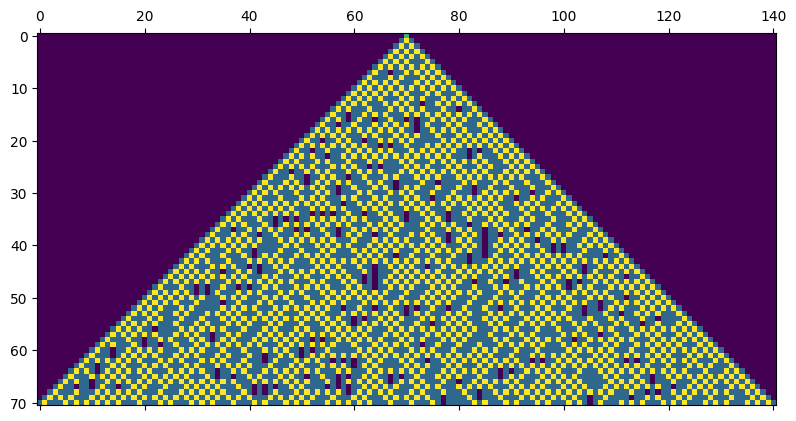

In [31]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
import matplotlib.pyplot as plt

diagram = np.genfromtxt("input07.txt", dtype=str, delimiter=1)[::2,:]
BS_count, curr_tachyons = 0, {int(np.argwhere(diagram[0]=="S")[0,0])}
for row in diagram[1:]:
    new_tachyons = set()
    for pos in curr_tachyons:
        if row[pos]=="^":
            new_tachyons.add(pos-1); new_tachyons.add(pos+1)
            row[pos-1]="|"; row[pos+1]="|"
            BS_count+=1
        else: new_tachyons.add(pos); row[pos]="|"
    curr_tachyons = new_tachyons
print(f"Split {BS_count} times, out of {np.sum(diagram=='^')} BS total")
little_dict = {"S":2, "^":3, "|":1, ".":0}
plt.matshow(np.vectorize(little_dict.get)(diagram).astype(int));

Part Two

This is a case for multiset! (Lists do the trick in principle, but not in practiceable time)

In [54]:
from multiset import Multiset as mset

diagram = np.genfromtxt("input07.txt", dtype=str, delimiter=1)[::2,:]

TL_count, curr_tachyons = 1, mset({int(np.argwhere(diagram[0]=="S")[0,0])})
for row in diagram[1:]:
    new_tachyons = mset()
    for pos, qty in curr_tachyons.items():
        if row[pos]=="^":
            new_tachyons.add(pos-1,qty); new_tachyons.add(pos+1,qty)
            TL_count+=qty
        else: new_tachyons.add(pos, qty);
    curr_tachyons = new_tachyons
print(f"Total {TL_count} different timelines")

Total 422102272495018 different timelines
